# Chapter 12. AB testing for better marketing strategy

## 12.1 AB testing for marketing 

A/B testing plays a critical role in decision-making processes across various industries. A/B testing is essentially a method of comparing and testing the effectiveness and benefits of two different business strategies. It can be considered as an experiment where two or more variants are tested for a set period of time and then the experiment results are evaluated to find the strategy that works best. Running A/B testing before fully committing to a single option helps businesses take the guesswork out of their decisionmaking processes and saves valuable resources, such as time and capital, that could have been wasted if the chosen strategy did not work.

## 12.2 Statistical hypothesis testing 

t-test is frequently used to test whether the difference between two tests is statistically significant. The t-test compares the two averages and examines whether they are significantly different from each other.

The t-value measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference there is between the two groups

## 12.3 Evaluating AB testing results with python

In [2]:
import pandas as pd
df = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


### Data analysis

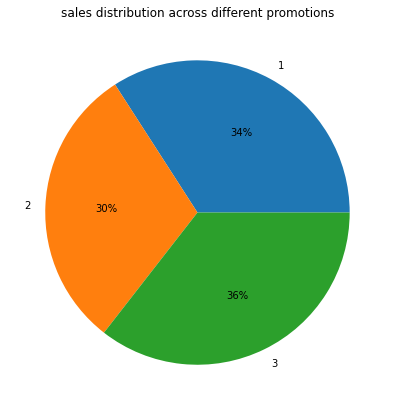

In [4]:
import matplotlib.pyplot as plt
ax = df.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)
ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')
plt.show()

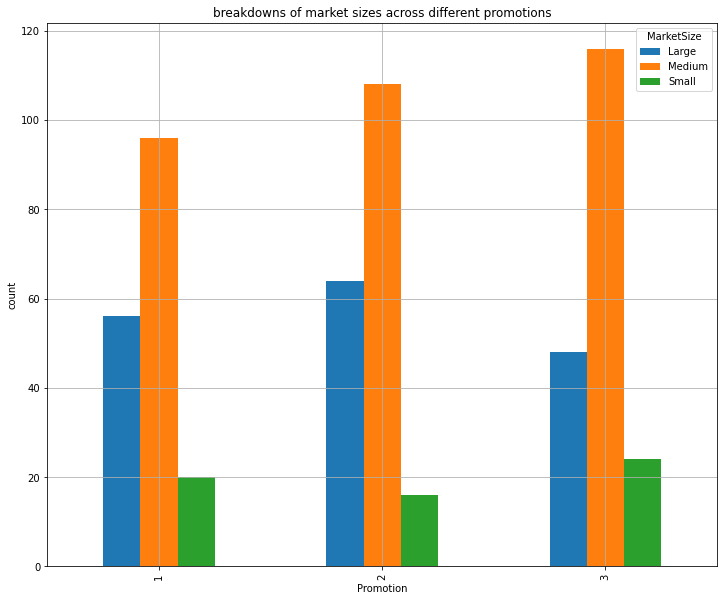

In [6]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).count()[
    'MarketID'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
)
ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')
plt.show()

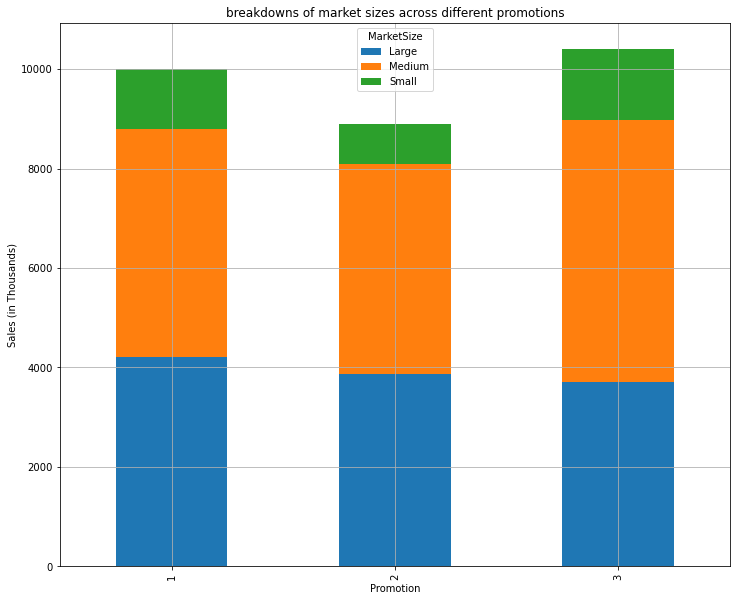

In [7]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)
ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')
plt.show()

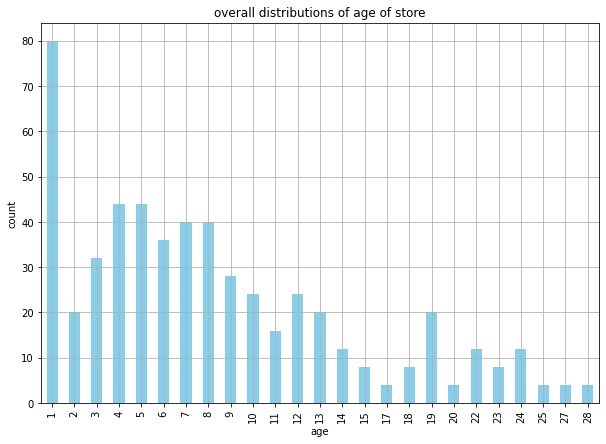

In [8]:
ax = df.groupby(
    'AgeOfStore'
).count()[
    'MarketID'
].plot(
    kind='bar',
    color='skyblue',
    figsize=(10,7),
    grid=True
)
ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')
plt.show()

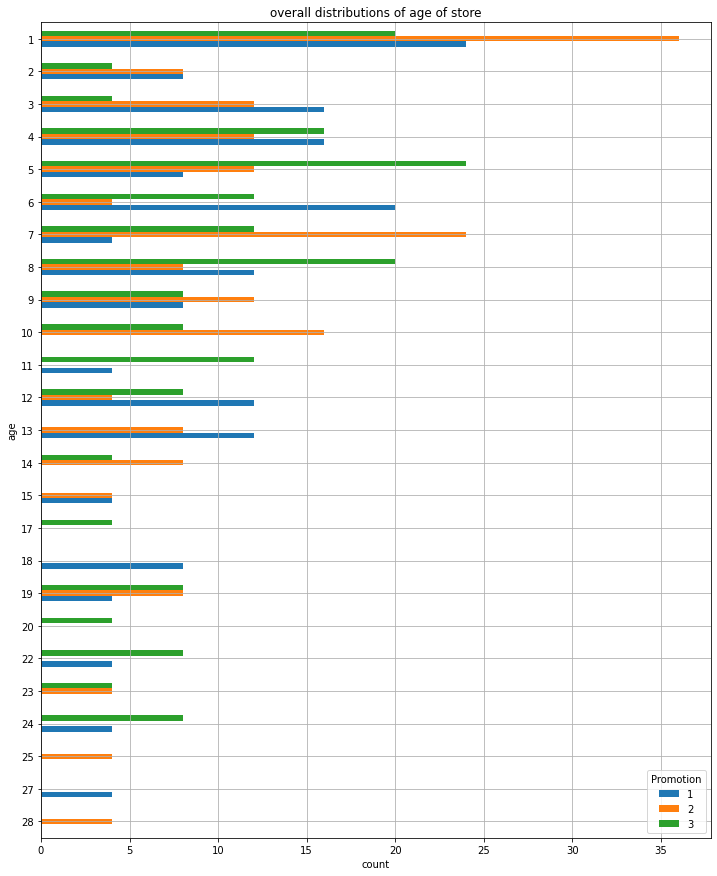

In [9]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh',
    figsize=(12,15),
    grid=True
)
ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')
plt.show()

In [10]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


### Statistical hypothesis testing

#### Computing t-value and p-value from the equations

In [11]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']

In [12]:
import numpy as np

t_1_vs_2 = (means.iloc[0] - means.iloc[1]) / np.sqrt((stds.iloc[0]**2 / ns.iloc[0]) + (stds.iloc[1]**2 / ns.iloc[1]))
t_1_vs_2

6.427528670907475

In [13]:
from scipy import stats

df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2
p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df = df_1_vs_1)) * 2
p_1_vs_2

4.143296816749853e-10

#### Computing the t-value and p-value using scipy

In [14]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
    equal_var = False
)
print(t, p)

6.42752867090748 4.2903687179871785e-10


## 12.4 Evaluating AB testing results with r